<a href="https://colab.research.google.com/github/hany606/LCT_Spring20IU/blob/master/Hany_Hamed_Lab_3_Stability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate LTI systems and check their stability

Check stability using Lyapunov equation

In [0]:
import numpy as np
from numpy.linalg import eig
from scipy import linalg

n = 3         # matrix size

A = np.random.randn(n, n) - np.eye(n)*0.5   # state matrix
l, v = eig(A)
print("A:\n", A)
print("eigenvalues:\n", l)
print("")

# system is stable if negative definite matrix P exists
# such that A*P + P*A^T = Q 
Q = np.eye(n)           # positive matrix

P = linalg.solve_lyapunov(A, Q)
l, v = eig(P)
print("P:", P)
print("eigenvalues:", l)

A:
 [[-1.67997703 -0.90578645  0.09436594]
 [-0.41149949 -0.85991403  2.13749672]
 [ 0.18197899 -0.0901526  -0.52526976]]
eigenvalues:
 [-2.11864808+0.j         -0.47325637+0.59351698j -0.47325637-0.59351698j]

P: [[-1.06927898  1.44723457  0.15388321]
 [ 1.44723457 -3.29389713 -0.81260105]
 [ 0.15388321 -0.81260105 -0.75911163]]
eigenvalues: [-4.19255861 -0.22341345 -0.70631569]


System behavior for impulse and step inputs

[[1.]
 [0.]
 [0.]]
[[0. 0. 1.]]
StateSpaceContinuous(
array([[-1.67997703, -0.90578645,  0.09436594],
       [-0.41149949, -0.85991403,  2.13749672],
       [ 0.18197899, -0.0901526 , -0.52526976]]),
array([[1.],
       [0.],
       [0.]]),
array([[0., 0., 1.]]),
array([[0]]),
dt: None
)


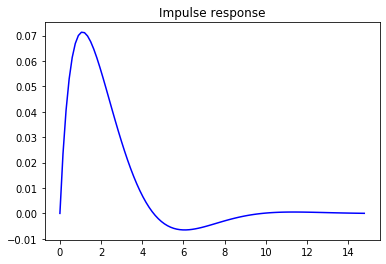

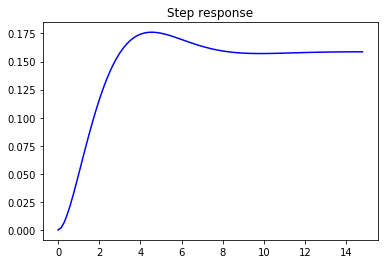

In [0]:
from scipy import signal
import matplotlib.pyplot as plt

B = np.zeros((n, 1)); B[0, 0] = 1        # input matrix     
C = np.zeros((1, n)); C[0,-1] = 1        # output matrix
print(B)
print(C)
D = 0

sys = signal.StateSpace(A,B,C,D)
print(sys)

# response for impulse funciton
t, y = signal.impulse(sys)            

plt.plot(t, y, "b")
plt.title('Impulse response')
plt.show()

# response for step function
t, y = signal.step(sys)               

plt.plot(t, y, "b")
plt.title('Step response')
plt.show()



# Nyquist

Nyquist diagram is obtained by substituting $\omega j$ instead of  $s$ into the transfer function of the system, and then plotting the real and imaginary parts of the resulting complex number as a parametric curve, given by $\omega $.

Lucky for us, we can simply call a built-in function, `scipy.signal.freqresp()` in this case, and it returns us the complex values sequence as a function of $\omega $. Description is here: https://docs.scipy.org/doc/scipy-0.16.1/reference/generated/scipy.signal.freqresp.html


d1: [[ 0.00000000e+00 -1.77635684e-15  1.81978989e-01  1.93584038e-01]]
d2: [1.         3.06516083 2.58156142 1.22083706]
d1 trimmed: [[0.18197899 0.19358404]]


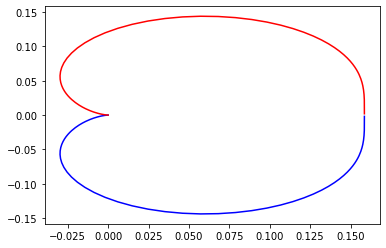

yay, it's stable


In [0]:
# convert into transfer functions
d1, d2 = signal.ss2tf(A,B,C,D)
print("d1:", d1)     # numerator(s)
print("d2:", d2)     # denomitator

# remove small high order terms 
while abs(d1[0, 0]) < 0.001:    
    d1 = d1[:,1:]
print("d1 trimmed:", d1)

# find frequency response 
Count = 200
w = np.logspace(-2, 2, num = Count) 
w, H = signal.freqresp((d1, d2), w)

# visualize
plt.plot(H.real, H.imag, "b")   # positive frequencies
plt.plot(H.real,-H.imag, "r")   # negative frequencies
plt.show()

# plt.plot(w, np.absolute(H), "b")
# plt.xscale('log')
# plt.title('Amplitude vs frequency')
# plt.show()

# plt.plot(w, np.angle(H), "r")
# plt.xscale('log')
# plt.title('Phase vs frequency')
# plt.show()

# # save results for Bode plot
Nyquist_w = w
Nyquist_mag = np.absolute(H)


e,v = eig(A)
if (max(np.real(e)) < 0):
  print("yay, it's stable")
else:
  print("nope, it's not stable")
  

Why we don't use Nyquist Plot to determine stability? Because:

![alt text](https://rmechanics.files.wordpress.com/2019/07/nyquist.png)

Compare it with this:
 
*An LTI system is asymptotically stable if and only if all the eigenvalues have strictly negative real part*

Or in psuedocode:

`if max(real(eig(A))) < 0 then stable`

# Bode

There are other plots, besides Nyquist. Bode is one of them. Unlike Nyquist, it is two real-valued plots, where as Nyquist is complex-valued.

To understand their connection, you can think of it this way. Let $Z(\omega)$ be a Nyquist plot. Then phase plot is given as:

$$\varphi (\omega) = arg(Z(\omega)) $$

and amplitude plot is:


$$A (\omega) = |Z(\omega)| $$

In case of Bode plot, we have phase plot $H(\omega)$, and magnitude plot $B(\omega)$ in decibels. Phase plot $H(\omega) = \varphi (\omega) = arg(Z(\omega))$, and magnitude plot:
$$B(\omega) = 20 log_{10}|Z(\omega)|$$
or 
$$B(\omega) = 20 log_{10}A (\omega)$$

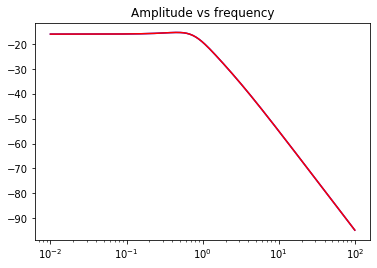

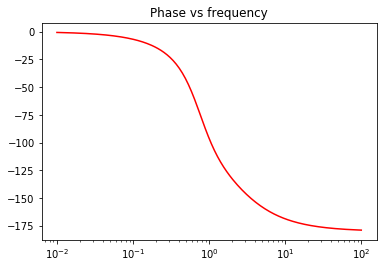

In [0]:
from numpy import log10
from scipy import signal

# find parameters for Bode plot
w, mag, phase = signal.bode((d1, d2), w)

# show and compare results
plt.plot(w, mag, "b")
plt.plot(Nyquist_w, 20*log10(Nyquist_mag), "r") #notice that it is identical
plt.xscale('log')
plt.title('Amplitude vs frequency')
plt.show()

plt.plot(w, phase, "r")
plt.xscale('log')
plt.title('Phase vs frequency')
plt.show()



# Pole placement

Let's try to add control that shifts the poles of the system to where we want them

Old poles: [ 1.88208254 -0.98761928  0.75704731]

[-0.1+0.j  -0.1+0.2j -0.1-0.2j]
Gain matrix: [[ 1.95151057  2.64221639 -2.24246896]]



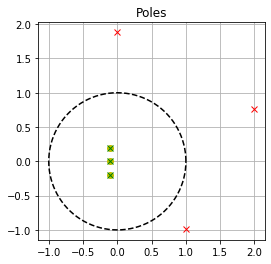

In [0]:
# find zero, pole and gain for the transfer function
Z, P, themp = signal.tf2zpk(d1, d2)
print("Old poles:", P)
print("")

# desirable poles
P_desired = np.array([-0.1, -0.1+0.2j, -0.1-0.2j]) 
print(P_desired)

# find K such that eigenvalues(A - B*K) = poles
fsf = signal.place_poles(A, B, P_desired, method='YT')

print("Gain matrix:", fsf.gain_matrix)
print("")

# focus
time = np.linspace(0, 2*np.pi, 401)
plt.plot(np.cos(time), np.sin(time), 'k--')  # unit circle

# initial poles
plt.plot(P, 'bx', Color='r')   
# desired poles
plt.plot(fsf.requested_poles.real, fsf.requested_poles.imag,
         'wo', label='Desired', Color='y')
# obtained poles
plt.plot(fsf.computed_poles.real, fsf.computed_poles.imag, 'bx',
          label='Placed', Color='g')
plt.grid()
plt.axis('image')

plt.title('Poles')
plt.show()

# What frequency does to an LTI system - code it by hand

Here we try to have a better view of what a frequency response means. We will take a sine wave as a control input and check what the output is like for different frequencies.



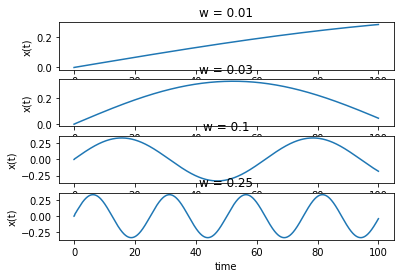

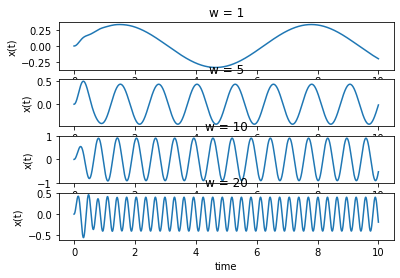

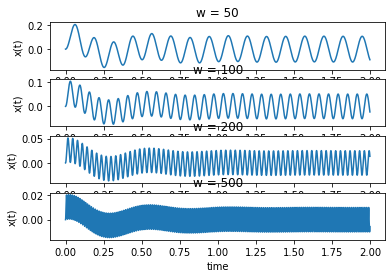

In [0]:

from math import sin, cos
from scipy.integrate import odeint

mu = 1;
k = 100;

kp = 50;
kd = 5;

# create input function for a given frequency
def GetControlInput(w):
    return lambda t: (sin(w*t),    # x(t)
                      w*cos(w*t))  # dx(t)    

# system
def GetOscillator(w):
    # trajectory
    ControlInput = GetControlInput(w)
    # output
    def Oscillator(x, t):
        x_desired, dx_desired = ControlInput(t)
        error     = x_desired  - x[0]
        error_dot = dx_desired - x[1]
        u = kp*error + kd*error_dot
        return np.array([x[1], (u - mu*x[1] - k*x[0])])
    return Oscillator

time = np.linspace(0, 100, 10000)  # period
x = np.zeros((2))                  # initial conditions

def PlotForFrequency(w):
    # find system behavior 
    Oscillator = GetOscillator(w)
    solution = odeint(Oscillator, x, time)
    # visualize
    plt.plot(time, solution[:, 0])
    plt.xlabel('time')
    plt.ylabel('x(t)')

# "small" frequency    
plt.subplot(411)
PlotForFrequency(0.01)
plt.title('w = 0.01')

plt.subplot(412)
PlotForFrequency(0.03)
plt.title('w = 0.03')

plt.subplot(413)
PlotForFrequency(0.1)
plt.title('w = 0.1')

plt.subplot(414)
PlotForFrequency(0.25)
plt.title('w = 0.25')

plt.show()

# "medium" frequency
time = np.linspace(0, 10, 10000) # reduce period

plt.subplot(411)
PlotForFrequency(1)
plt.title('w = 1')

plt.subplot(412)
PlotForFrequency(5)
plt.title('w = 5')

plt.subplot(413)
PlotForFrequency(10)
plt.title('w = 10')

plt.subplot(414)
PlotForFrequency(20)
plt.title('w = 20')

plt.show()

# "high" frequency
time = np.linspace(0, 2, 10000)

plt.subplot(411)
PlotForFrequency(50)
plt.title('w = 50')

plt.subplot(412)
PlotForFrequency(100)
plt.title('w = 100')

plt.subplot(413)
PlotForFrequency(200)
plt.title('w = 200')

plt.subplot(414)
PlotForFrequency(500)
plt.title('w = 500')

plt.show()


Notice how the amplitude changes.

Let us find how the incurred cost will change with the frequency of the control input signal:

In [0]:
from numpy.linalg import norm

# integral position error
def cost(solution, time, w):
    # get input
    ControlInput = GetControlInput(w)
    J = 0     # accumulator    
    for i in range(1,time.shape[0]):
        x_desired, _ = ControlInput(time[i])
        x = solution[i]        
        J += norm(x_desired - x[0]) * (time[i] - time[i-1])    
    return J

# estimate cost for w = 3
Oscillator = GetOscillator(3)
solution = odeint(Oscillator, x, time)
print(cost(solution, time, 3))


0.8471061795179242


Find cost for some range of frequencies

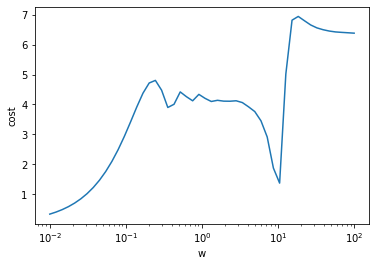

In [0]:
# range of frequencies
Count = 50
w = np.logspace(-2, 2, num = Count)
# range of time
time = np.linspace(0, 10, 10000)

# find costs
response = np.zeros(Count)
for i in range(0, Count):
    Oscillator = GetOscillator(w[i])
    solution = odeint(Oscillator, x, time)
    response[i] = cost(solution, time, w[i])
    
plt.plot(w, response)
plt.xlabel('w')
plt.ylabel('cost')
plt.xscale('log')

plt.show()    
    

# Questions

* What are these graphs in the last section? How are they different from frequecy responce and phase responce?

# **Answer**


# Tasks

* Build Bode plot for a random system.
* Replace poles to make it stable and build Bode plot for the new system.
* Prove stability with Nyquist (or Mikhailov) technique.

# **Task1**

Build Bode plot for a random system


A:
 [[4.61504507 0.35714003]
 [0.05120949 5.94281045]]
eigenvalues:
 [4.60141083 5.95644469]

d1 trimmed: [[0.05120949]]


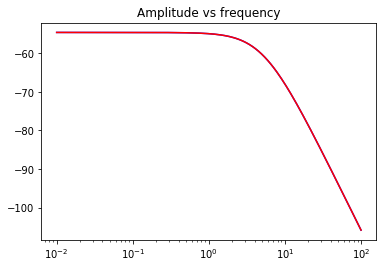

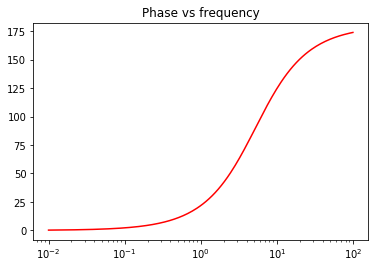

It's not stable


In [13]:
import numpy as np
from numpy.linalg import eig
from scipy import linalg
from scipy import signal
import matplotlib.pyplot as plt
from numpy import log10
from scipy import signal

n = 2         # matrix size

A = np.random.randn(n, n) + np.eye(n)*5   # state matrix
l, v = eig(A)
print("A:\n", A)
print("eigenvalues:\n", l)
print("")

B = np.zeros((n, 1)); B[0, 0] = 1        # input matrix     
C = np.zeros((1, n)); C[0,-1] = 1        # output matrix
D = 0



d1, d2 = signal.ss2tf(A,B,C,D)

# remove small high order terms 
while abs(d1[0, 0]) < 0.001:    
    d1 = d1[:,1:]
print("d1 trimmed:", d1)

# find frequency response 
Count = 200
w = np.logspace(-2, 2, num = Count) 
w, H = signal.freqresp((d1, d2), w)

# find parameters for Bode plot
w, mag, phase = signal.bode((d1, d2), w)

Nyquist_w = w
Nyquist_mag = np.absolute(H)

# show and compare results
plt.plot(w, mag, "b")
plt.plot(Nyquist_w, 20*log10(Nyquist_mag), "r") #notice that it is identical
plt.xscale('log')
plt.title('Amplitude vs frequency')
plt.show()

plt.plot(w, phase, "r")
plt.xscale('log')
plt.title('Phase vs frequency')
plt.show()

e,v = eig(A)
if (max(np.real(e)) < 0):
  print("It's stable")
else:
  print("It's not stable")


# **Task2**

Replace poles to make it stable and build Bode plot for the new system.


A:
 [[4.16580695 0.91149802]
 [1.38757083 6.84400627]]
eigenvalues:
 [3.75620539 7.25360784]

d1 trimmed: [[1.38757083]]


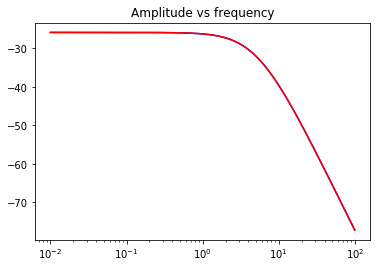

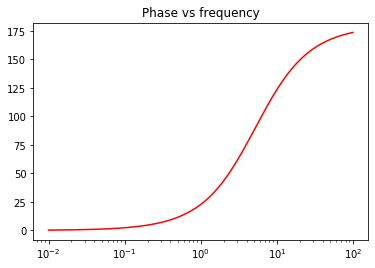

It's not stable
Old poles: [7.25360784 3.75620539]

[-0.1+0.2j -0.1-0.2j]
Gain matrix: [[11.20981322 35.6911446 ]]



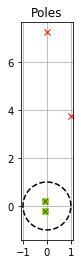

/usr/local/lib/python3.6/dist-packages/scipy/signal/filter_design.py:1622: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)
/usr/local/lib/python3.6/dist-packages/scipy/signal/filter_design.py:1068: RuntimeWarning: invalid value encountered in true_divide
  b /= b[0]
/usr/local/lib/python3.6/dist-packages/scipy/signal/ltisys.py:2434: RuntimeWarning: divide by zero encountered in log10
  mag = 20.0 * numpy.log10(abs(y))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: RuntimeWarning: divide by zero encountered in log10


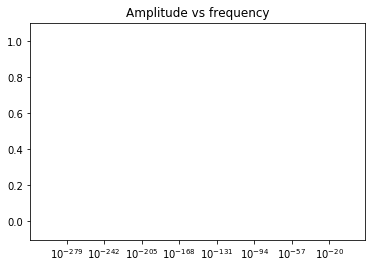

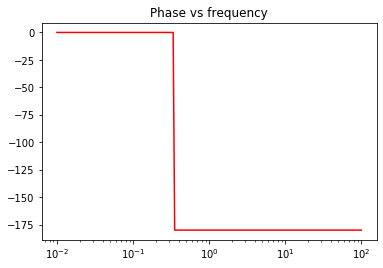

It's stable


In [32]:
import numpy as np
from numpy.linalg import eig
from scipy import linalg
from scipy import signal
import matplotlib.pyplot as plt
from numpy import log10
from scipy import signal

n = 2         # matrix size

A = np.random.randn(n, n) + np.eye(n)*5   # state matrix
l, v = eig(A)
print("A:\n", A)
print("eigenvalues:\n", l)
print("")

B = np.zeros((n, 1)); B[0, 0] = 1        # input matrix     
C = np.zeros((1, n)); C[0,-1] = 1        # output matrix
D = 0



d1, d2 = signal.ss2tf(A,B,C,D)

# remove small high order terms 
while abs(d1[0, 0]) < 0.001:    
    d1 = d1[:,1:]
print("d1 trimmed:", d1)

# find frequency response 
Count = 200
w = np.logspace(-2, 2, num = Count) 
w, H = signal.freqresp((d1, d2), w)

# find parameters for Bode plot
w, mag, phase = signal.bode((d1, d2), w)

Nyquist_w = w
Nyquist_mag = np.absolute(H)

# show and compare results
plt.plot(w, mag, "b")
plt.plot(Nyquist_w, 20*log10(Nyquist_mag), "r") #notice that it is identical
plt.xscale('log')
plt.title('Amplitude vs frequency')
plt.show()

plt.plot(w, phase, "r")
plt.xscale('log')
plt.title('Phase vs frequency')
plt.show()

e,v = eig(A)
if (max(np.real(e)) < 0):
  print("It's stable")
else:
  print("It's not stable")

# find zero, pole and gain for the transfer function
Z, P, themp = signal.tf2zpk(d1, d2)
print("Old poles:", P)
print("")

# desirable poles
P_desired = np.array([-0.1+0.2j, -0.1-0.2j]) 
print(P_desired)

# find K such that eigenvalues(A - B*K) = poles
fsf = signal.place_poles(A, B, P_desired, method='YT')

print("Gain matrix:", fsf.gain_matrix)
print("")

# focus
time = np.linspace(0, 2*np.pi, 401)
plt.plot(np.cos(time), np.sin(time), 'k--')  # unit circle

# initial poles
plt.plot(P, 'bx', Color='r')   
# desired poles
plt.plot(fsf.requested_poles.real, fsf.requested_poles.imag,
         'wo', label='Desired', Color='y')
# obtained poles
plt.plot(fsf.computed_poles.real, fsf.computed_poles.imag, 'bx',
          label='Placed', Color='g')
plt.grid()
plt.axis('image')

plt.title('Poles')
plt.show()

d1, d2 = signal.ss2tf(A-B*fsf.gain_matrix,np.zeros((n,1)),C,D)

# # remove small high order terms 
# while abs(d1[0, 0]) < 0.001:    
#     d1 = d1[:,1:]
# print("d1 trimmed:", d1)

# find frequency response 
Count = 200
w = np.logspace(-2, 2, num = Count) 
w, H = signal.freqresp((d1, d2), w)

# find parameters for Bode plot
w, mag, phase = signal.bode((d1, d2), w)

Nyquist_w = w
Nyquist_mag = np.absolute(H)

# show and compare results
plt.plot(w, mag, "b")
plt.plot(Nyquist_w, 20*log10(Nyquist_mag), "r") #notice that it is identical
plt.xscale('log')
plt.title('Amplitude vs frequency')
plt.show()

plt.plot(w, phase, "r")
plt.xscale('log')
plt.title('Phase vs frequency')
plt.show()

e,v = eig(A-B*fsf.gain_matrix)
if (max(np.real(e)) < 0):
  print("It's stable")
else:
  print("It's not stable")
